# Single file

In [2]:
import librosa
x, sr = librosa.load('/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [3]:
print(x.shape)
print(sr)

(72838,)
22050


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

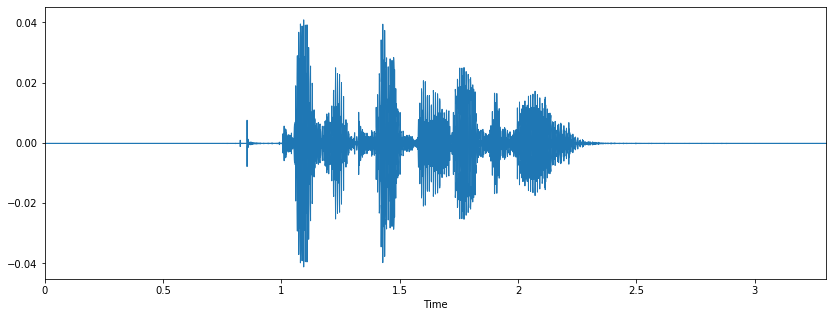

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [6]:
from IPython.display import Audio

In [7]:
Audio(data=x, rate=sr)

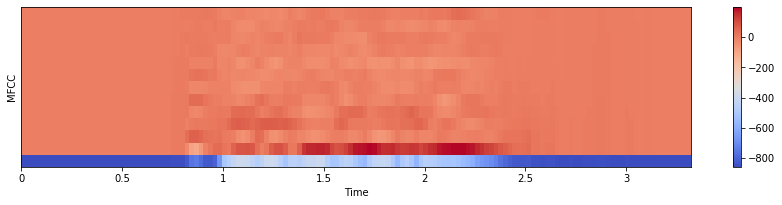

In [8]:
single_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(single_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [9]:
single_mfcc

array([[-857.30945334, -857.30945334, -857.30945334, ..., -857.30945334,
        -857.30945334, -857.30945334],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

# Whole Dataset (1440 files)

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ten

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

This means the meta data for the audio file is:

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement "dogs" (02)

1st Repetition (01)

12th Actor (12) - Female (as the actor ID number is even)

In [11]:
audio = "/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/"

actor_folders = os.listdir(audio) #list files in audio directory
actor_folders.sort() 
actor_folders[0:5]

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05']

In [12]:
audio

'/Users/murielkosaka/Desktop/capstone_project/audio/audio_speech_actors_01-24/'

In [13]:
# audio/audio/audio_speech_actors_01-24/Actor_14
# 03-01-02-01-02-01-14.wav

emotion = []
gender = []
file_path = []
for i in actor_folders:
    filename = os.listdir(audio + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(audio + i + '/' + f)

In [14]:
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df],axis=1)
audio_df.columns = ['gender','emotion']
audio_df['labels'] =audio_df.gender + '_' + audio_df.emotion
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df = audio_df.drop(['gender', 'emotion'], axis=1)
audio_df.labels.value_counts()

female_surprise    96
male_happy         96
male_angry         96
female_calm        96
female_sad         96
male_fear          96
male_calm          96
female_angry       96
female_disgust     96
female_happy       96
male_surprise      96
male_sad           96
female_fear        96
male_disgust       96
female_neutral     48
male_neutral       48
Name: labels, dtype: int64

In [15]:
audio_df.to_csv('audio.csv')

In [16]:

os.listdir(audio)

['Actor_16',
 'Actor_11',
 'Actor_18',
 'Actor_20',
 'Actor_21',
 'Actor_19',
 'Actor_10',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_02',
 'Actor_05',
 'Actor_12',
 'Actor_15',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_14',
 'Actor_13',
 'Actor_09',
 'Actor_07',
 'Actor_06',
 'Actor_01',
 'Actor_08']

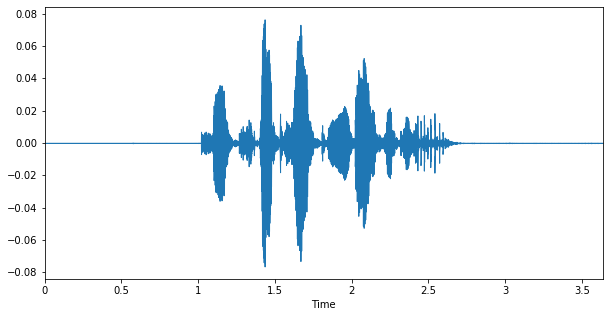

In [17]:
fname = audio + 'Actor_02/03-01-01-01-01-01-02.wav'  #female neutral
data_neutral, sr_neutral = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data_neutral, sr=sr_neutral)
ipd.Audio(fname)

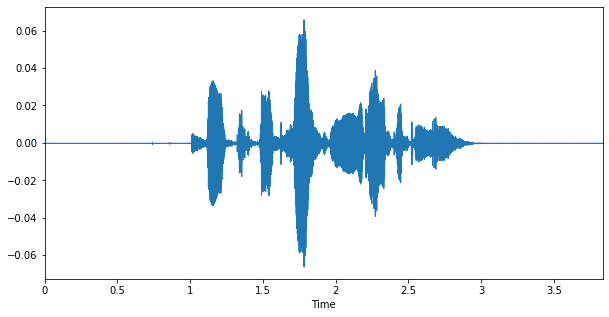

In [18]:
fname = audio + 'Actor_02/03-01-02-01-01-01-02.wav'  #female calm
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(10, 5))
librosa.display.waveplot(data, sr=sampling_rate)
ipd.Audio(fname)


# MFCC
### The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. MFCC is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

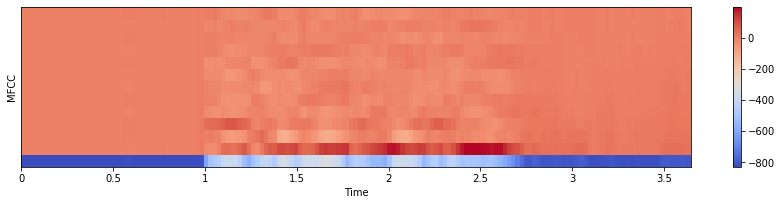

In [19]:
fa_mfcc = librosa.feature.mfcc(y=data_neutral, sr=sr_neutral, n_mfcc=13)
plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(fa_mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

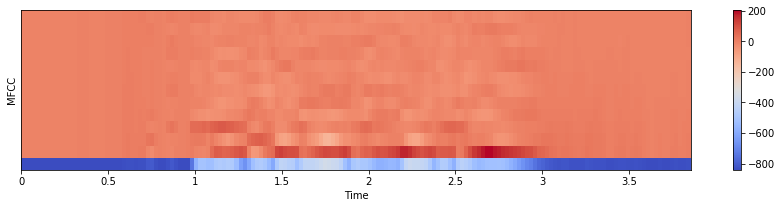

In [20]:
# MFCC
#The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features 
#(usually about 10–20) which concisely describe the overall shape of a spectral envelope.
# good "representation" of the vocal tract that produces the sound. Think of it like an 
# x-ray of your mouth
mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar();

In [21]:
mfcc.shape

(13, 166)

216
216


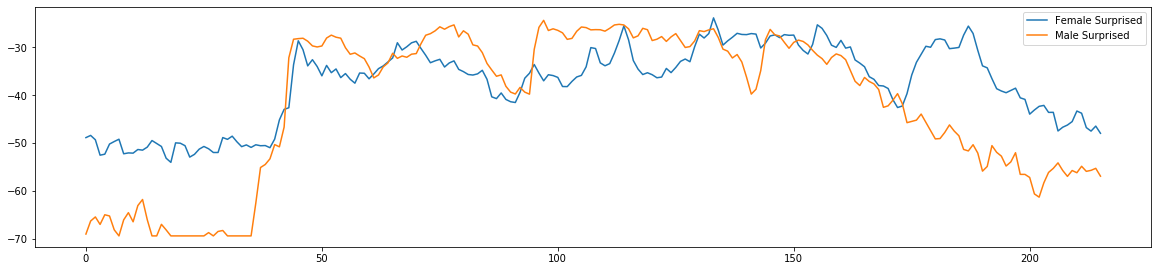

In [22]:
# Male surprised
pathh = audio + 'Actor_09/03-01-08-02-02-02-09.wav'
X, sample_rate = librosa.load(pathh, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Female surprised
path= audio + 'Actor_08/03-01-08-02-02-02-08.wav'
X, sample_rate = librosa.load(path,duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='Female Surprised')
plt.plot(male, label='Male Surprised')
plt.legend()



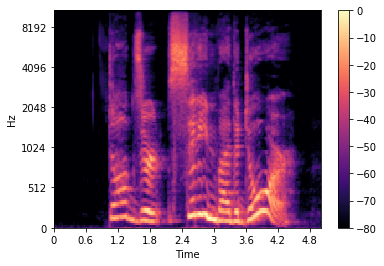

In [23]:
# Spectrogram - how the audio spectrum varies as a function of time
spectrogram = librosa.feature.melspectrogram(y=X, sr=sampling_rate)
db_spec = librosa.power_to_db(spectrogram, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='time', sr=sampling_rate)
plt.colorbar();

## Feature Extraction

In [33]:
df = pd.DataFrame(columns=['mfcc_feature'])

# feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   


print(len(df))
df.head()


1440


,mfcc_feature
0,"[-61.862374191339036, -61.862374191339036, -61..."
1,"[-61.50800105381538, -61.50800105381538, -61.5..."
2,"[-55.66308593160217, -56.17033629546251, -56.1..."
3,"[-63.52352959684379, -63.52352959684379, -63.5..."
4,"[-43.19739053316282, -44.238600301837614, -43...."


In [39]:
df_chroma = pd.DataFrame(columns=['chroma_feat'])

# feature extraction over the entire dataset
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    
    chroma=np.mean(librosa.feature.chroma_stft(X, sr=sample_rate).T,axis=0)
    df_chroma.loc[counter] = [chroma]
    counter=counter+1   


df_chroma['chroma_feat'].values.tolist()

[array([0.46880473, 0.47816363, 0.52992258, 0.55081125, 0.52886602,
        0.54802423, 0.45562584, 0.45148199, 0.44391569, 0.44459914,
        0.44352531, 0.4451984 ]),
 array([0.53292897, 0.55402933, 0.53205146, 0.51557887, 0.52597382,
        0.51004595, 0.51861401, 0.62202664, 0.57523746, 0.55589594,
        0.55802095, 0.54486144]),
 array([0.48669973, 0.49230447, 0.4314999 , 0.44229523, 0.5171837 ,
        0.46967429, 0.42884997, 0.48531641, 0.52128353, 0.47691963,
        0.50725898, 0.51024531]),
 array([0.61332865, 0.53293005, 0.49553702, 0.48075112, 0.41027175,
        0.38842378, 0.46159785, 0.52040711, 0.47737922, 0.4500248 ,
        0.5253556 , 0.60833982]),
 array([0.33653845, 0.45246616, 0.42184598, 0.30563196, 0.32543975,
        0.33606504, 0.2838761 , 0.32611104, 0.36861959, 0.34746917,
        0.35629631, 0.33249434]),
 array([0.30207689, 0.31697319, 0.36052937, 0.39769845, 0.43687234,
        0.42431083, 0.3747582 , 0.47235166, 0.46062041, 0.35762077,
        0.3271

In [37]:
# Extract the mean bands to its own feature columns
df_combined = pd.concat([audio_df,pd.DataFrame(df['mfcc_feature'].values.tolist()),pd.DataFrame(df_chroma['chroma_feat'].values.tolist())],axis=1)
df_combined[:5]

,labels,path,0,1,2,3,4,5,6,7,...,2,3,4,5,6,7,8,9,10,11
0,male_surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,0.529923,0.550811,0.528866,0.548024,0.455626,0.451482,0.443916,0.444599,0.443525,0.445198
1,male_surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,0.532051,0.515579,0.525974,0.510046,0.518614,0.622027,0.575237,0.555896,0.558021,0.544861
2,male_angry,/Users/murielkosaka/Desktop/capstone_project/a...,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,...,0.431500,0.442295,0.517184,0.469674,0.428850,0.485316,0.521284,0.476920,0.507259,0.510245
3,male_fear,/Users/murielkosaka/Desktop/capstone_project/a...,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,...,0.495537,0.480751,0.410272,0.388424,0.461598,0.520407,0.477379,0.450025,0.525356,0.608340
4,male_fear,/Users/murielkosaka/Desktop/capstone_project/a...,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,...,0.421846,0.305632,0.325440,0.336065,0.283876,0.326111,0.368620,0.347469,0.356296,0.332494


In [25]:
# def extract_feature(file_name, mfcc, chroma, mel):
#     with soundfile.SoundFile(file_name) as sound_file:
#         X = sound_file.read(dtype="float32")
#         sample_rate=sound_file.samplerate
#         if chroma:
#             stft=np.abs(librosa.stft(X))
#         result=np.array([])
#         if mfcc:
#             mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
#             result=np.hstack((result, mfccs))
#         if chroma:
#             chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, chroma))
#         if mel:
#             mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
#             result=np.hstack((result, mel))

In [26]:
# Extract the mean bands to its own feature columns
df = pd.concat([audio_df,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,path,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,male_surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,-61.862374,...,-61.862374,-61.862374,-61.761406,-60.348411,-60.160468,-61.384289,-60.519129,-61.495963,-61.862374,-60.531564
1,male_surprise,/Users/murielkosaka/Desktop/capstone_project/a...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,...,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001,-61.508001
2,male_angry,/Users/murielkosaka/Desktop/capstone_project/a...,-55.663086,-56.170336,-56.157848,-54.663471,-55.166778,-56.156944,-56.156944,-56.156944,...,-55.155076,-56.156944,-56.156944,-56.156944,-55.844215,-56.156944,-56.156944,-56.156944,-56.156944,-56.156944
3,male_fear,/Users/murielkosaka/Desktop/capstone_project/a...,-63.523530,-63.523530,-63.523530,-63.523530,-63.523530,-63.377373,-61.595853,-63.160227,...,-39.336517,-39.847823,-40.466040,-40.448086,-42.883065,-43.367558,-46.280296,-48.273818,-49.745182,-50.472916
4,male_fear,/Users/murielkosaka/Desktop/capstone_project/a...,-43.197391,-44.238600,-43.996203,-44.132351,-44.267863,-44.346034,-44.142895,-44.255212,...,-32.987086,-33.476288,-33.367659,-32.961880,-31.957900,-31.085171,-31.186023,-30.768853,-19.886076,-12.408972


In [ ]:
df = df.fillna(0)
